TRIP ADVISOR NLP PROJECT

In [5]:
#project by williambd 
#on 2020-10-01
#uses scikit learn
#I learned and used a lot from Stack Abuse's NLP sentiment Tutorial
import numpy as np
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
hotel_data = pd.read_csv('C:\\Users\\LiamDeaton\\Documents\\DATAProj\\tripadvisor_hotel_reviews.csv')

Analysis

In [9]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
hotel_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


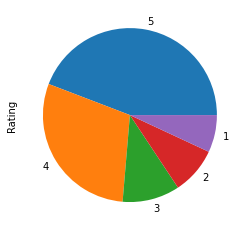

In [11]:
hotel_data.Rating.value_counts().plot(kind = 'pie')

In [12]:
raw_reviews = hotel_data.loc[:,'Review']
rating = hotel_data.loc[:,'Rating']

CLEANING

In [13]:
#clean so that there are no apostrophes (')
processed_reviews = []

for i in range(len(raw_reviews.index)):
    
    #lower case
    processed_review = raw_reviews[i].lower()
    
    #replace possesive '
    processed_review = processed_review.replace("\'"," ")
    
    #replace double spaces
    processed_review = processed_review.replace('  ',' ')
    
    #replace stranded possesive s
    processed_review = processed_review.replace(' s ', ' ')
    
    #reattach stranded t, since they denote the opposite of their attached word
    processed_review = processed_review.replace(' t ', 't ')
    
    processed_reviews.append(processed_review)
    

In [14]:
print(processed_reviews[5])

love monaco staff husband stayed hotel crazy weekend attending memorial service best friend husband celebrating 12th wedding anniversary, talk mixed emotions, booked suite hotel monte carlos, loaned beautiful fan-tanned goldfish named joliet weekend visited dogs worked desk human companions, room decorated nicely couch used pillows, l occitane bath amenities welcome sight, room quiet peaceful, wireless internet access wonderful server went morning leaving problems printing boarding passes, afternoon reception serves oenophile-satisfying wine australia scrumptious cookies, restaurant closed renovation stay finally ate food good drinks better, word caution restaurant larger person not sit booths wo nt fit, 5 6 125 lbs husband 5 9 175. table smack-against stomach couple inches space mighty uncomfortable patron larger pregnant, bad design opinion place decorated funky welcoming way metal wood handblown glass light fixtures expect seattle capital glass art industry, definitely stay reason, 

MODEL BUILDING TIME

Personal notes on TF-IDF (term frequency - inverse document frequency):
    basically for each review, TF = (frequency of word)/(total words)
                               IDF = log(total number of docs/docs with word)
    I'm building model based on frequency of words in reviews..
    (I'd like to try other approaches in the future. but for now this works)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer with max number of words, word must show up in 7, no more than 80%.
vectorizer = TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8)

review_vector = vectorizer.fit_transform(processed_reviews)

In [37]:
#print(vectorizer.get_feature_names())

In [17]:
print(review_vector.shape)

(20491, 2500)


SPLITTING DATA

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(review_vector,rating, test_size = 0.2, random_state = 5)

MODEL DATA

In [33]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators = 200, random_state = 5)
text_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=5)

TEST

In [34]:
rating_predictions = text_classifier.predict(x_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,rating_predictions))
print(accuracy_score(y_test,rating_predictions))

              precision    recall  f1-score   support

           1       0.67      0.56      0.61       286
           2       0.34      0.08      0.13       361
           3       0.40      0.03      0.05       420
           4       0.46      0.37      0.41      1258
           5       0.60      0.92      0.72      1774

    accuracy                           0.56      4099
   macro avg       0.49      0.39      0.39      4099
weighted avg       0.52      0.56      0.50      4099

0.5591607709197365


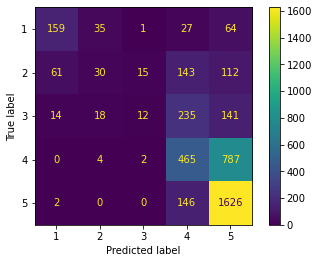

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(text_classifier,x_test,y_test)

Im Gonna try a regressor, Since I care more about the code getting close, than the code getting it right

In [22]:
from sklearn.ensemble import RandomForestRegressor

review_estimate = RandomForestRegressor(n_estimators = 200, random_state = 5)
review_estimate.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=5)

In [30]:
rating_predictions = review_estimate.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,rating_predictions))

0.6479007074896316


Seems Pretty Good :)